#Dupla

Edgard Henrique Coelho Tavares da Silva - 20210027041

Gabriel Vieira Coutinho - 202100139075

Leitura do arquivo

In [ ]:
def ler_grafo(arquivo):
    with open(arquivo, 'r') as f:
        n = int(f.readline().strip())  # Lê o número de vértices
        grafo = [list(map(int, f.readline().split())) for _ in range(n)]  # Lê as linhas para a matriz de adjacência
    return grafo

# Caminho do arquivo com a matriz de adjacência do grafo
caminho_arquivo_grafo = '/content/graph_20'

#Busca em Largura

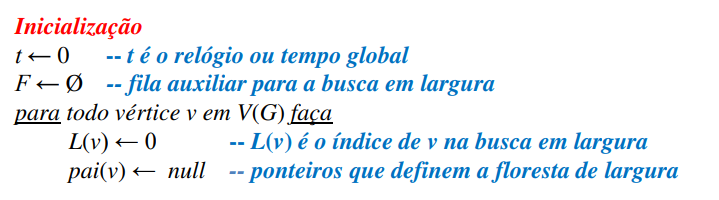

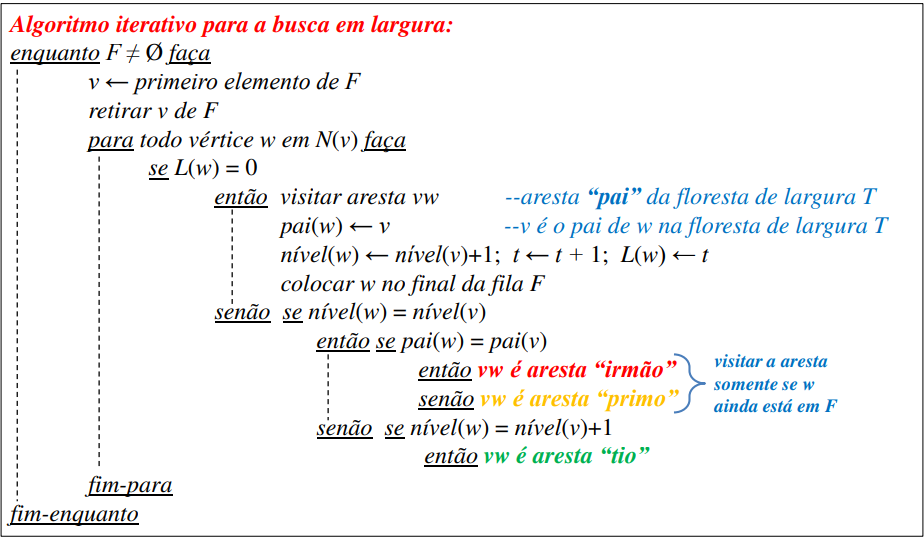

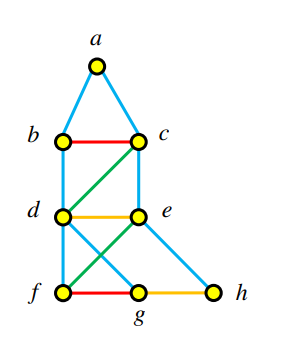

Se w ainda não foi visitado (not visitado[w]):

pai[w] = v: w tem v como seu vértice pai na árvore de busca BFS.

nivel[w] = nivel[v] + 1: o nível de w é definido como o nível de v + 1, indicando sua distância em relação ao vértice de início.

t += 1 e L[w] = t: o tempo de descoberta é incrementado e registrado para w.

visitado[w] = True: marca w como visitado.

fila.append(w): w é adicionado à fila para explorar seus vértices adjacentes em futuras iterações.

arestas.append((v, w, '0,0,255')): registra a aresta de v para w como uma aresta-pai (azul).

Se w já foi visitado, o código classifica a aresta conectando v e w baseado em suas relações:

Aresta irmão ('255,0,0' - vermelho): Se w e v estão no mesmo nível e têm o mesmo pai.

Aresta primo ('255,255,0' - amarelo): Se w e v estão no mesmo nível, mas têm pais diferentes.

Aresta tio ('0,255,0' - verde): Se w está um nível acima de v e já foi descoberto anteriormente.


In [ ]:
def bfs(grafo, vertice_inicio):
    n = len(grafo)
    visitado = [False] * n
    nivel = [-1] * n
    pai = [-1] * n
    L = [0] * n  # Lista para armazenar os tempos de descoberta L[w], inicializada com 0
    t = 0  # Tempo global

    nivel[vertice_inicio] = 0  # O vértice de início começa com nível 0
    visitado[vertice_inicio] = True  # O vértice de início é marcado como visitado
    L[vertice_inicio] = t  # O tempo de descoberta do vértice de início é 0
    fila = [vertice_inicio]  # A fila começa com o vértice de início
    arestas = []  # Lista para armazenar as arestas

    while fila:
        v = fila.pop(0)  # Remove e retorna o primeiro elemento da fila
        for w in range(n):
            if grafo[v][w] == 1:  # Verifica se existe uma aresta entre v e w
                if not visitado[w]:
                    pai[w] = v
                    nivel[w] = nivel[v] + 1
                    t += 1
                    L[w] = t  # Incrementa o tempo ao descobrir w
                    visitado[w] = True
                    fila.append(w)  # Adiciona w no final da fila
                    arestas.append((v, w, '0,0,255'))  # Aresta-pai (azul)
                else:
                    # Se w já foi visitado, determinar o tipo de aresta (irmão, primo, tio)
                    if nivel[w] == nivel[v]:
                        if pai[w] == pai[v]:
                            arestas.append((v, w, '255,0,0'))  # Aresta irmão
                        else:
                            arestas.append((v, w, '255,255,0'))  # Aresta primo
                    elif nivel[w] == nivel[v] + 1 and L[w] != 0:
                        arestas.append((v, w, '0,255,0'))  # Aresta tio

    # Removendo arestas duplicadas e garantindo ordem crescente
    arestas_unicas = set()
    for v, w, cor in arestas:
        if v > w:  # Garantir ordem crescente
            v, w = w, v
        arestas_unicas.add((v + 1, w + 1, cor))  # Convertendo de volta para 1-index

    return nivel, sorted(arestas_unicas, key=lambda x: (x[0], x[1]))

# Função para gerar o arquivo GDF ajustada para não incluir arestas duplicadas
def gerar_arquivo_gdf(n, arestas_unicas):
    conteudo = "nodedef>name VARCHAR,label VARCHAR\n"
    for i in range(1, n+1):
        conteudo += f"{i},{i}\n"

    conteudo += "edgedef>node1 VARCHAR,node2 VARCHAR,directed BOOLEAN,color VARCHAR\n"
    for v1, v2, cor in arestas_unicas:
        conteudo += f"{v1},{v2},false,'{cor}'\n"

    return conteudo


In [ ]:
def resultado(arquivo_grafo):
    # Ler o grafo do arquivo
    grafo = ler_grafo(arquivo_grafo)

    # Executar a busca em largura e classificar as arestas
    _, arestas_classificadas = bfs(grafo, 0)
    conteudo_gdf = gerar_arquivo_gdf(len(grafo), arestas_classificadas)

    # Imprimir o resultado
    print(conteudo_gdf)

    # Salvar o conteúdo GDF em um arquivo
    nome_arquivo_gdf = "output.gdf"
    with open(nome_arquivo_gdf, 'w') as arquivo:
        arquivo.write(conteudo_gdf)

    # Nome do arquivo para comparação
    out_esperado = 'graph_20_bfs.gdf'

    # Comparar o arquivo gerado com o arquivo de comparação
    sao_iguais = False
    with open(nome_arquivo_gdf, 'r') as arquivo1, open(out_esperado, 'r') as arquivo2:
        conteudo1 = arquivo1.read()
        conteudo2 = arquivo2.read()
        sao_iguais = (conteudo1 == conteudo2)

    # Imprimir o resultado da comparação
    if sao_iguais:
        print("Os arquivos são iguais.")
    else:
        print("Os arquivos são diferentes.")

    return conteudo_gdf


In [ ]:
conteudo_gdf = resultado(caminho_arquivo_grafo)

nodedef>name VARCHAR,label VARCHAR
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9
10,10
11,11
12,12
13,13
14,14
15,15
16,16
17,17
18,18
19,19
20,20
21,21
22,22
23,23
24,24
25,25
26,26
27,27
28,28
29,29
30,30
31,31
32,32
33,33
34,34
35,35
36,36
37,37
38,38
39,39
40,40
41,41
42,42
43,43
44,44
45,45
46,46
47,47
48,48
49,49
50,50
edgedef>node1 VARCHAR,node2 VARCHAR,directed BOOLEAN,color VARCHAR
1,2,false,'0,0,255'
1,3,false,'0,0,255'
1,4,false,'0,0,255'
1,5,false,'0,0,255'
1,7,false,'0,0,255'
1,8,false,'0,0,255'
1,12,false,'0,0,255'
1,13,false,'0,0,255'
1,15,false,'0,0,255'
1,16,false,'0,0,255'
1,19,false,'0,0,255'
1,20,false,'0,0,255'
1,22,false,'0,0,255'
1,23,false,'0,0,255'
1,24,false,'0,0,255'
1,25,false,'0,0,255'
1,26,false,'0,0,255'
1,27,false,'0,0,255'
1,28,false,'0,0,255'
1,33,false,'0,0,255'
1,34,false,'0,0,255'
1,35,false,'0,0,255'
1,37,false,'0,0,255'
1,38,false,'0,0,255'
1,39,false,'0,0,255'
1,40,false,'0,0,255'
1,42,false,'0,0,255'
1,43,false,'0,0,255'
1,44,false,'0,0,255'
1,45,false,'0

#O raio de um grafo é a menor distância máxima de um vértice a todos os outros vértices no grafo.

#O diâmetro de um grafo é a maior distância entre quaisquer dois vértices no grafo.

In [ ]:
def calcular_raio_e_diametro_usando_bfs(arquivo_grafo):
    grafo = ler_grafo(arquivo_grafo)
    n = len(grafo)
    distancias_maximas = []

    for vertice_inicio in range(n):
        nivel, _ = bfs(grafo, vertice_inicio)
        distancia_maxima = max(nivel)  # A maior distância a partir deste vértice
        distancias_maximas.append(distancia_maxima)

    diametro = max(distancias_maximas)
    raio = min(distancias_maximas)

    return raio, diametro

# Chamando a função com o caminho do arquivo fornecido
raio, diametro = calcular_raio_e_diametro_usando_bfs(caminho_arquivo_grafo)
print(f"Raio do grafo: {raio}, Diâmetro do grafo: {diametro}")

Raio do grafo: 2, Diâmetro do grafo: 2


In [ ]:
def calcular_distancia_media(arquivo_grafo):
    grafo = ler_grafo(arquivo_grafo)
    n = len(grafo)
    soma_distancias = 0
    total_pares = n * (n - 1) // 2  #Calcula o total de pares de vértices únicos no grafo tomados 2 a 2

    for vertice_inicio in range(n):
        nivel, _ = bfs(grafo, vertice_inicio)
        # Somar as distâncias para cada vértice, excluindo o próprio vértice inicial
        for vertice_destino in range(vertice_inicio + 1, n):
          soma_distancias += nivel[vertice_destino]

    # Calcular a distância média
    distancia_media = soma_distancias / total_pares

    return distancia_media

distancia_media = calcular_distancia_media(caminho_arquivo_grafo)
print(f"Distância média entre dois vértices no grafo: {distancia_media}")

Distância média entre dois vértices no grafo: 1.3853061224489795


#Busca em Profundidade


In [ ]:
def read_file(file_path):
    with open(file_path, 'r') as file:
        num_vertices = int(file.readline().strip())
        matriz = []
        vizinhos = [[] for _ in range(num_vertices)]
        arestas = []

        for _ in range(num_vertices):
            line = file.readline().strip().split()
            matriz.append([int(x) for x in line])

        for i in range(num_vertices):
           for j in range(num_vertices):
              if matriz[i][j] == 1:
                  vizinhos[i].append(j)

        for i in range(num_vertices):
            for j in range(num_vertices):
                if matriz[i][j] == 1:
                    if (i+1,j+1) not in arestas:
                        arestas.append((i+1,j+1))


    return num_vertices, matriz, vizinhos, arestas

In [ ]:
def dfs(i, vizinhos, visitados, pai, arestas_descida, arestas_retorno):
    visitados[i] = True
    for j in vizinhos[i]:
        if not visitados[j]:
            pai[j] = i
            arestas_descida.append((i+1, j+1))
            dfs(j, vizinhos, visitados, pai, arestas_descida, arestas_retorno)
        elif pai[i] != j:
            arestas_retorno.append((i+1, j+1))

In [ ]:
def dfs_start(num_vertices, vizinhos):
    visitados = [False] * num_vertices
    pai = [-1] * num_vertices
    arestas_descida = []
    arestas_retorno = []

    dfs(0, vizinhos, visitados, pai, arestas_descida, arestas_retorno)

    return arestas_descida, arestas_retorno

In [ ]:
def padronizar_arestas(arestas_descida, arestas_retorno):
    for i in range(len(arestas_descida)):
        if arestas_descida[i][0] > arestas_descida[i][1]:
            arestas_descida[i] = (arestas_descida[i][1], arestas_descida[i][0])

    for i in range(len(arestas_retorno)):
        if arestas_retorno[i][0] > arestas_retorno[i][1]:
            arestas_retorno[i] = (arestas_retorno[i][1], arestas_retorno[i][0])
    return arestas_descida, arestas_retorno

In [ ]:
def gerar_arquivo_dfs(arestas, arestas_descida, num_vertices, arestas_retorno):
    conteudo = "nodedef>name VARCHAR,label VARCHAR\n"
    for i in range(num_vertices):
        conteudo += f"{i+1},{i+1}\n"

    conteudo += "edgedef>node1 VARCHAR,node2 VARCHAR,directed BOOLEAN,color VARCHAR\n"
    for i in range(len(arestas)):
        if arestas[i] in arestas_descida:
            conteudo += f"{arestas[i][0]},{arestas[i][1]},false,'0,0,255'\n"
        elif arestas[i] in arestas_retorno:
            conteudo += f"{arestas[i][0]},{arestas[i][1]},false,'255,0,0'\n"

    arquivo = open('dfs_output.gdf', "w")
    print(conteudo)
    arquivo.write(conteudo)
    arquivo.close()

In [ ]:
def rodar_dfs(path):
    num_vertices, grafo, vizinhos, arestas = read_file(path)
    arestas_descida, arestas_retorno = dfs_start(num_vertices, vizinhos)
    arestas_descida, arestas_retorno = padronizar_arestas(arestas_descida, arestas_retorno)
    gerar_arquivo_dfs(arestas, arestas_descida, num_vertices, arestas_retorno)

In [ ]:
rodar_dfs('/content/graph_20')

In [ ]:
def compare(arquivo1, arquivo2):
  with open(arquivo1, 'r') as arquivo1, open(arquivo2, 'r') as arquivo2:
        conteudo1 = arquivo1.read()
        conteudo2 = arquivo2.read()
        sao_iguais = (conteudo1 == conteudo2)


  if sao_iguais:
    print("Os arquivos são iguais.")
  else:
    print("Os arquivos são diferentes.")

compare("dfs_output.gdf","graph_20_dfs.gdf")

Os arquivos são iguais.
